In [26]:
# Copyright 2019-2020 Steven Mattis and Troy Butler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import beta
import scipy.integrate.quadrature as quad
from luq.luq import *
from luq.dynamical_systems import PredatorPrey

import ipywidgets as wd
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'axes.linewidth': 2})

np.random.seed(123456)

Model is for a predator-prey system,
$$x'(t) = (b-py)x,$$
$$y'(t) = (rx-d)y$$
with $b \in [0.5, 1.5]$, $p \in [0.8, 1.2]$, $r \in [0.5, 1.2]$, and $d \in [0.8, 1.5]$.

The solution is given by
$$C = b \ln y(t)−py(t)−rx(t)+d \ln x(t)$$

where $C = b\ln y(0)−py(0)−rx(0)+d\ln x(0)$.

A ***true*** distribution of $x(0), y(0), b, p, r$, and $d$ are defined by (non-uniform)
Beta distributions and used to generate a set of time series data.

An ***initial*** uniform distribution is assumed and updated by the true time series data.

In [27]:
# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(2E3)

params = np.random.uniform(size=(num_samples, 4))
ics = np.random.uniform(size=(num_samples, 2))

param_range = np.array([[1.0, 1.0], # b
                        [1.0, 1.0], # p
                        [0.8, 1.2], # r
                        [0.8, 1.2]]) # d
ic_range = np.array([[2.0, 2.0], # x(0)
                     [1.0, 1.0]]) # y(0)
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics
param_labels = [r'$b$', r'$p$', r'$r$', r'$d$']
ic_labels = [r'$x(0)$', r'$y(0)$']

# Construct the predicted time series data
num_time_preds = int(501)  # number of predictions (uniformly spaced) between [time_start,time_end]
time_start = 0.0
time_end = 6.0
times = np.linspace(time_start, time_end, num_time_preds)

phys = PredatorPrey()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

# Simulate an observed Beta distribution of time series data
num_obs = int(3E2)

true_a = 2
true_b = 2

# data generating distributions
params_obs = np.random.beta(size=(num_obs, 4), a=true_a, b=true_b)
ics_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

In [28]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 0
time_end_idx = num_time_preds-1

num_filtered_obs = 16

# Filter data with piecewise linear splines
learn.filter_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                     num_filtered_obs=num_filtered_obs, tol=5.0e-2, min_knots=3, max_knots=10)

0 4 0.022750453802282317
0 5 0.016845483224420275
0 5 knots being used with error of 0.016845483224420275
1 4 0.028802367795615902
1 5 0.018915261319464596
1 5 knots being used with error of 0.018915261319464596
2 4 0.04240903637024014
2 5 0.026236148157639437
2 5 knots being used with error of 0.026236148157639437
3 4 0.0634953719955627
3 5 0.039943414974571864
3 6 0.02917562967877956
3 6 knots being used with error of 0.02917562967877956
4 4 0.06146371349727461
4 5 0.03902546189547548
4 6 0.029200597665802335
4 6 knots being used with error of 0.029200597665802335
5 4 0.02664005653250131
5 5 0.01671167982916724
5 5 knots being used with error of 0.01671167982916724
6 4 0.05832478935592338
6 5 0.03675585650137318
6 5 knots being used with error of 0.03675585650137318
7 4 0.07354686071358593
7 5 0.04682552697284785
7 6 0.03596861661232573
7 6 knots being used with error of 0.03596861661232573
8 4 0.047867493369455755
8 5 0.029808841293467177
8 5 knots being used with error of 0.0298088

79 5 0.033365155816034185
79 5 knots being used with error of 0.033365155816034185
80 4 0.04168676448174463
80 5 0.026803268858789055
80 5 knots being used with error of 0.026803268858789055
81 4 0.04894538018083865
81 5 0.030047490695327424
81 5 knots being used with error of 0.030047490695327424
82 4 0.05068836591316402
82 5 0.031946880191569424
82 5 knots being used with error of 0.031946880191569424
83 4 0.05177906383054507
83 5 0.03272015940051605
83 5 knots being used with error of 0.03272015940051605
84 4 0.07320140908883938
84 5 0.046612929412565896
84 6 0.035323468637313775
84 6 knots being used with error of 0.035323468637313775
85 4 0.07277639477254161
85 5 0.046366479847847634
85 6 0.03555841066465976
85 6 knots being used with error of 0.03555841066465976
86 4 0.022436003004740784
86 5 0.016572197297025436
86 5 knots being used with error of 0.016572197297025436
87 4 0.06613707566162409
87 5 0.04211016771986357
87 6 0.031487270894344034
87 6 knots being used with error of 

154 4 0.03753968281183367
154 5 0.023954251535547925
154 5 knots being used with error of 0.023954251535547925
155 4 0.07153902873192315
155 5 0.04561375484107198
155 6 0.03432022910250862
155 6 knots being used with error of 0.03432022910250862
156 4 0.06942326600611252
156 5 0.04407038786405434
156 6 0.03210760732919223
156 6 knots being used with error of 0.03210760732919223
157 4 0.05771953160234785
157 5 0.0358573331883967
157 5 knots being used with error of 0.0358573331883967
158 4 0.04180452144600365
158 5 0.025082068876803518
158 5 knots being used with error of 0.025082068876803518
159 4 0.05173092778194069
159 5 0.03308816912901355
159 5 knots being used with error of 0.03308816912901355
160 4 0.020984641555989815
160 5 0.01498807123654049
160 5 knots being used with error of 0.01498807123654049
161 4 0.04988209989035077
161 5 0.030105047473590177
161 5 knots being used with error of 0.030105047473590177
162 4 0.0486286700077003
162 5 0.028826817126601383
162 5 knots being u

229 5 0.025492567514494004
229 5 knots being used with error of 0.025492567514494004
230 4 0.03994824057933983
230 5 0.025406778137955405
230 5 knots being used with error of 0.025406778137955405
231 4 0.051390457432491564
231 5 0.031990233013803035
231 5 knots being used with error of 0.031990233013803035
232 4 0.034730162359574906
232 5 0.021100090282813122
232 5 knots being used with error of 0.021100090282813122
233 4 0.06613629899936223
233 5 0.04181928251751045
233 6 0.030616732373223755
233 6 knots being used with error of 0.030616732373223755
234 4 0.045775658556790305
234 5 0.02700339136767011
234 5 knots being used with error of 0.02700339136767011
235 4 0.024226329725322304
235 5 0.018295606824587484
235 5 knots being used with error of 0.018295606824587484
236 4 0.031274154229633505
236 5 0.019704217464873757
236 5 knots being used with error of 0.019704217464873757
237 4 0.019806146854128164
237 4 knots being used with error of 0.019806146854128164
238 4 0.0327579412238688

302 6 0.02714730969846042
302 6 knots being used with error of 0.02714730969846042
303 4 0.020638600749659855
303 4 knots being used with error of 0.020638600749659855
304 4 0.06142903072111341
304 5 0.03875150494921454
304 6 0.028570556651943597
304 6 knots being used with error of 0.028570556651943597
305 4 0.03501269582400774
305 5 0.021594436621414033
305 5 knots being used with error of 0.021594436621414033
306 4 0.05372249097006511
306 5 0.0335667278292567
306 5 knots being used with error of 0.0335667278292567
307 4 0.04411791290053892
307 5 0.026090268412556846
307 5 knots being used with error of 0.026090268412556846
308 4 0.04632083975113987
308 5 0.027306705260662877
308 5 knots being used with error of 0.027306705260662877
309 4 0.04351300505543872
309 5 0.025837794946707304
309 5 knots being used with error of 0.025837794946707304
310 4 0.036261703099382404
310 5 0.022842916416389837
310 5 knots being used with error of 0.022842916416389837
311 4 0.024260948812725943
311 5

380 5 0.024837842349544184
380 5 knots being used with error of 0.024837842349544184
381 4 0.018652880558425906
381 4 knots being used with error of 0.018652880558425906
382 4 0.07123624035860292
382 5 0.045403687861422355
382 6 0.03354733726511935
382 6 knots being used with error of 0.03354733726511935
383 4 0.07110681602574316
383 5 0.04529589192102381
383 6 0.03338776854700959
383 6 knots being used with error of 0.03338776854700959
384 4 0.019597100319853723
384 4 knots being used with error of 0.019597100319853723
385 4 0.06369795176739321
385 5 0.04018021331603189
385 6 0.02945984940434418
385 6 knots being used with error of 0.02945984940434418
386 4 0.026809439368112996
386 5 0.017455792936798865
386 5 knots being used with error of 0.017455792936798865
387 4 0.0423085819720127
387 5 0.025091768772987424
387 5 knots being used with error of 0.025091768772987424
388 4 0.03292018245807687
388 5 0.020238599410786717
388 5 knots being used with error of 0.020238599410786717
389 4 

457 5 0.033579804553927915
457 5 knots being used with error of 0.033579804553927915
458 4 0.04314015134940681
458 5 0.02579563926761036
458 5 knots being used with error of 0.02579563926761036
459 4 0.041217694261083786
459 5 0.025890968677376384
459 5 knots being used with error of 0.025890968677376384
460 4 0.05744202671978329
460 5 0.03621270821171233
460 5 knots being used with error of 0.03621270821171233
461 4 0.0515966478354208
461 5 0.030969658076857122
461 5 knots being used with error of 0.030969658076857122
462 4 0.039187878836651785
462 5 0.02414128783288579
462 5 knots being used with error of 0.02414128783288579
463 4 0.03193668232342977
463 5 0.020762802965043892
463 5 knots being used with error of 0.020762802965043892
464 4 0.030329765177860114
464 5 0.019027207759238506
464 5 knots being used with error of 0.019027207759238506
465 4 0.04937388780423832
465 5 0.029323029703830522
465 5 knots being used with error of 0.029323029703830522
466 4 0.04254957934912208
466 5

530 6 0.0282810958568723
530 6 knots being used with error of 0.0282810958568723
531 4 0.05286976659613356
531 5 0.033082600007366916
531 5 knots being used with error of 0.033082600007366916
532 4 0.07405606070726457
532 5 0.04715979313279924
532 6 0.03575291735651768
532 6 knots being used with error of 0.03575291735651768
533 4 0.04235257855871652
533 5 0.025900097498451676
533 5 knots being used with error of 0.025900097498451676
534 4 0.0340586728546281
534 5 0.020824333358208685
534 5 knots being used with error of 0.020824333358208685
535 4 0.05447989055336763
535 5 0.03327010199124435
535 5 knots being used with error of 0.03327010199124435
536 4 0.028756220662489174
536 5 0.0189031028474764
536 5 knots being used with error of 0.0189031028474764
537 4 0.056115485117315046
537 5 0.03428540621475494
537 5 knots being used with error of 0.03428540621475494
538 4 0.03381944531114715
538 5 0.02086362154577765
538 5 knots being used with error of 0.02086362154577765
539 4 0.04285697

605 4 0.03445205149461637
605 5 0.020905438931706818
605 5 knots being used with error of 0.020905438931706818
606 4 0.04863980440605428
606 5 0.03085999090838601
606 5 knots being used with error of 0.03085999090838601
607 4 0.03223815751468684
607 5 0.021404461170656794
607 5 knots being used with error of 0.021404461170656794
608 4 0.061480383800743596
608 5 0.03898688129467914
608 6 0.029073566660606797
608 6 knots being used with error of 0.029073566660606797
609 4 0.04454547819944127
609 5 0.027181113550349193
609 5 knots being used with error of 0.027181113550349193
610 4 0.05090716017606372
610 5 0.030926051907797403
610 5 knots being used with error of 0.030926051907797403
611 4 0.04113102116466253
611 5 0.02470656629829857
611 5 knots being used with error of 0.02470656629829857
612 4 0.056873067429054326
612 5 0.034716650233971955
612 5 knots being used with error of 0.034716650233971955
613 4 0.06366516588845976
613 5 0.03990858583555242
613 6 0.028982487450155296
613 6 kno

677 4 0.05113295320292303
677 5 0.031139760475832102
677 5 knots being used with error of 0.031139760475832102
678 4 0.03955237884124336
678 5 0.023710190067845235
678 5 knots being used with error of 0.023710190067845235
679 4 0.055270984144239206
679 5 0.03468560536518753
679 5 knots being used with error of 0.03468560536518753
680 4 0.037107645429280654
680 5 0.023763179160983715
680 5 knots being used with error of 0.023763179160983715
681 4 0.03150080010086282
681 5 0.019545453580495628
681 5 knots being used with error of 0.019545453580495628
682 4 0.03845915985241559
682 5 0.023292543661266617
682 5 knots being used with error of 0.023292543661266617
683 4 0.049951752692047824
683 5 0.03194568010109475
683 5 knots being used with error of 0.03194568010109475
684 4 0.030713130393241275
684 5 0.018890434879615642
684 5 knots being used with error of 0.018890434879615642
685 4 0.02275148938247845
685 5 0.0153441080977528
685 5 knots being used with error of 0.0153441080977528
686 4

750 4 0.07186769571116741
750 5 0.04586680962699244
750 6 0.03491784783024637
750 6 knots being used with error of 0.03491784783024637
751 4 0.03616985300941768
751 5 0.02271349363398325
751 5 knots being used with error of 0.02271349363398325
752 4 0.01789993601606573
752 4 knots being used with error of 0.01789993601606573
753 4 0.04678487955673559
753 5 0.027944126480344274
753 5 knots being used with error of 0.027944126480344274
754 4 0.05208515646383347
754 5 0.03197339363956455
754 5 knots being used with error of 0.03197339363956455
755 4 0.0278662167355241
755 5 0.017322641002960965
755 5 knots being used with error of 0.017322641002960965
756 4 0.036406495222176566
756 5 0.022468188027924278
756 5 knots being used with error of 0.022468188027924278
757 4 0.06046849036881465
757 5 0.03865297424720737
757 5 knots being used with error of 0.03865297424720737
758 4 0.0428794539412594
758 5 0.027416756419147568
758 5 knots being used with error of 0.027416756419147568
759 4 0.0178

824 4 0.047987232686799365
824 5 0.028995196888605818
824 5 knots being used with error of 0.028995196888605818
825 4 0.04999704703369247
825 5 0.030042877933672003
825 5 knots being used with error of 0.030042877933672003
826 4 0.05283005633030391
826 5 0.03323326995749727
826 5 knots being used with error of 0.03323326995749727
827 4 0.05110672901765122
827 5 0.03159878896676292
827 5 knots being used with error of 0.03159878896676292
828 4 0.03909254478728205
828 5 0.024339890294615422
828 5 knots being used with error of 0.024339890294615422
829 4 0.03671149888554977
829 5 0.02321719683621779
829 5 knots being used with error of 0.02321719683621779
830 4 0.05532457843370514
830 5 0.03384647801065771
830 5 knots being used with error of 0.03384647801065771
831 4 0.033026307960619214
831 5 0.020164650487169145
831 5 knots being used with error of 0.020164650487169145
832 4 0.03069744315029897
832 5 0.019362290972603356
832 5 knots being used with error of 0.019362290972603356
833 4 0

900 4 0.0435479107871475
900 5 0.026530391452008396
900 5 knots being used with error of 0.026530391452008396
901 4 0.026439913850463365
901 5 0.017204875071610296
901 5 knots being used with error of 0.017204875071610296
902 4 0.045513302582154955
902 5 0.029210970744650174
902 5 knots being used with error of 0.029210970744650174
903 4 0.058646174667194934
903 5 0.0373971600854882
903 5 knots being used with error of 0.0373971600854882
904 4 0.04793886165468009
904 5 0.02946044215438038
904 5 knots being used with error of 0.02946044215438038
905 4 0.06036192044810659
905 5 0.03761152423149518
905 6 0.02732395390488758
905 6 knots being used with error of 0.02732395390488758
906 4 0.027823296431584835
906 5 0.01960464855907426
906 5 knots being used with error of 0.01960464855907426
907 4 0.01774769719796073
907 4 knots being used with error of 0.01774769719796073
908 4 0.02647373805970105
908 5 0.019187165655236895
908 5 knots being used with error of 0.019187165655236895
909 4 0.04

974 5 0.019339085694942325
974 5 knots being used with error of 0.019339085694942325
975 4 0.03362825161747857
975 5 0.02050610246447335
975 5 knots being used with error of 0.02050610246447335
976 4 0.06698308181137749
976 5 0.04254104064568411
976 6 0.031422179383345
976 6 knots being used with error of 0.031422179383345
977 4 0.04042332272521911
977 5 0.024093412593504865
977 5 knots being used with error of 0.024093412593504865
978 4 0.061680996618622426
978 5 0.038427599558900745
978 6 0.027836062948080883
978 6 knots being used with error of 0.027836062948080883
979 4 0.021782269388634687
979 5 0.014808176541150754
979 5 knots being used with error of 0.014808176541150754
980 4 0.04237776186570265
980 5 0.02570063908517173
980 5 knots being used with error of 0.02570063908517173
981 4 0.04065198745722664
981 5 0.02422601543793161
981 5 knots being used with error of 0.02422601543793161
982 4 0.04689422120663317
982 5 0.027617855275689756
982 5 knots being used with error of 0.027

1048 4 0.046777514352367655
1048 5 0.02941896900071542
1048 5 knots being used with error of 0.02941896900071542
1049 4 0.02089688336841668
1049 5 0.014681039338789812
1049 5 knots being used with error of 0.014681039338789812
1050 4 0.02193649206555028
1050 4 knots being used with error of 0.02193649206555028
1051 4 0.04427075048753595
1051 5 0.026802532131161128
1051 5 knots being used with error of 0.026802532131161128
1052 4 0.05182865006669172
1052 5 0.03289924385205119
1052 5 knots being used with error of 0.03289924385205119
1053 4 0.06099155295500458
1053 5 0.03869962715044609
1053 6 0.028864147806823108
1053 6 knots being used with error of 0.028864147806823108
1054 4 0.05457959432534078
1054 5 0.03358491396315527
1054 5 knots being used with error of 0.03358491396315527
1055 4 0.0741901545155548
1055 5 0.047229087798621186
1055 6 0.035924065208148455
1055 6 knots being used with error of 0.035924065208148455
1056 4 0.07102700172465358
1056 5 0.045285057136731054
1056 6 0.0336

1122 4 0.04135824977755847
1122 5 0.024983688028534397
1122 5 knots being used with error of 0.024983688028534397
1123 4 0.04710189822785436
1123 5 0.029571269428338536
1123 5 knots being used with error of 0.029571269428338536
1124 4 0.034937528625127244
1124 5 0.02213439445748178
1124 5 knots being used with error of 0.02213439445748178
1125 4 0.017432358254353096
1125 4 knots being used with error of 0.017432358254353096
1126 4 0.06011845044553957
1126 5 0.037161839502846614
1126 6 0.026784824398504305
1126 6 knots being used with error of 0.026784824398504305
1127 4 0.035003717927029686
1127 5 0.022121261221820853
1127 5 knots being used with error of 0.022121261221820853
1128 4 0.044977386348612564
1128 5 0.02865349902246716
1128 5 knots being used with error of 0.02865349902246716
1129 4 0.04025418670263184
1129 5 0.024731555110285325
1129 5 knots being used with error of 0.024731555110285325
1130 4 0.05259007830553583
1130 5 0.033587508444389354
1130 5 knots being used with erro

1198 5 0.029411322099633132
1198 5 knots being used with error of 0.029411322099633132
1199 4 0.06675119682566623
1199 5 0.042245995343016436
1199 6 0.030936122168982064
1199 6 knots being used with error of 0.030936122168982064
1200 4 0.06229972700432818
1200 5 0.03865035763372379
1200 6 0.027839864137093783
1200 6 knots being used with error of 0.027839864137093783
1201 4 0.042652050772969026
1201 5 0.025305173980555637
1201 5 knots being used with error of 0.025305173980555637
1202 4 0.047432351078436505
1202 5 0.028121493473813815
1202 5 knots being used with error of 0.028121493473813815
1203 4 0.06452549411761982
1203 5 0.04037049052506094
1203 6 0.029213633253380715
1203 6 knots being used with error of 0.029213633253380715
1204 4 0.04241562705715036
1204 5 0.025312200585500426
1204 5 knots being used with error of 0.025312200585500426
1205 4 0.029954957631388647
1205 5 0.019906456680551163
1205 5 knots being used with error of 0.019906456680551163
1206 4 0.0522952101383528
1206

1271 6 0.027541758983181334
1271 6 knots being used with error of 0.027541758983181334
1272 4 0.027007771643565513
1272 5 0.019312272560077982
1272 5 knots being used with error of 0.019312272560077982
1273 4 0.04212352760558066
1273 5 0.025751939821921747
1273 5 knots being used with error of 0.025751939821921747
1274 4 0.04002677277759508
1274 5 0.024832974512004787
1274 5 knots being used with error of 0.024832974512004787
1275 4 0.02887595162964114
1275 5 0.019900061423802063
1275 5 knots being used with error of 0.019900061423802063
1276 4 0.06224754737262835
1276 5 0.0397505906443723
1276 6 0.030203022236700686
1276 6 knots being used with error of 0.030203022236700686
1277 4 0.03643468869629915
1277 5 0.022610241125000295
1277 5 knots being used with error of 0.022610241125000295
1278 4 0.051584331240294976
1278 5 0.032278403947382725
1278 5 knots being used with error of 0.032278403947382725
1279 4 0.027404146910759212
1279 5 0.019661637385923234
1279 5 knots being used with er

1343 4 0.05849740293192857
1343 5 0.03735528721693712
1343 5 knots being used with error of 0.03735528721693712
1344 4 0.05646616701122594
1344 5 0.035193284868280356
1344 5 knots being used with error of 0.035193284868280356
1345 4 0.051109308137417826
1345 5 0.0314243645351539
1345 5 knots being used with error of 0.0314243645351539
1346 4 0.019689971298748533
1346 4 knots being used with error of 0.019689971298748533
1347 4 0.06278989148743964
1347 5 0.039382531221156564
1347 6 0.028710999788321482
1347 6 knots being used with error of 0.028710999788321482
1348 4 0.03985842035364506
1348 5 0.025098972222918292
1348 5 knots being used with error of 0.025098972222918292
1349 4 0.03709402768393268
1349 5 0.023029954400263293
1349 5 knots being used with error of 0.023029954400263293
1350 4 0.026227648003211923
1350 5 0.01810156092304264
1350 5 knots being used with error of 0.01810156092304264
1351 4 0.04716361366656509
1351 5 0.029648693737676667
1351 5 knots being used with error of 

1413 5 0.02734185549164688
1413 5 knots being used with error of 0.02734185549164688
1414 4 0.05040145345615781
1414 5 0.031986877007252015
1414 5 knots being used with error of 0.031986877007252015
1415 4 0.037111185220943796
1415 5 0.023751740123593667
1415 5 knots being used with error of 0.023751740123593667
1416 4 0.04412007022987928
1416 5 0.026334436174707317
1416 5 knots being used with error of 0.026334436174707317
1417 4 0.02513373252423405
1417 5 0.018383472246702177
1417 5 knots being used with error of 0.018383472246702177
1418 4 0.06634609234034057
1418 5 0.042143227480448076
1418 6 0.031178103376359505
1418 6 knots being used with error of 0.031178103376359505
1419 4 0.07371371554323597
1419 5 0.04690590901642673
1419 6 0.03567500161276715
1419 6 knots being used with error of 0.03567500161276715
1420 4 0.07274288204168651
1420 5 0.046379548423685454
1420 6 0.03514866544773768
1420 6 knots being used with error of 0.03514866544773768
1421 4 0.033968923234827426
1421 5 0.

1485 4 0.04802557458948064
1485 5 0.02908896641798097
1485 5 knots being used with error of 0.02908896641798097
1486 4 0.03747489776806263
1486 5 0.023756018093006818
1486 5 knots being used with error of 0.023756018093006818
1487 4 0.04857686250928202
1487 5 0.03076173498315557
1487 5 knots being used with error of 0.03076173498315557
1488 4 0.056136082361043095
1488 5 0.03417909121164874
1488 5 knots being used with error of 0.03417909121164874
1489 4 0.019839409273462127
1489 4 knots being used with error of 0.019839409273462127
1490 4 0.03154036312974837
1490 5 0.019727355742515006
1490 5 knots being used with error of 0.019727355742515006
1491 4 0.025561434537368883
1491 5 0.016205868894899823
1491 5 knots being used with error of 0.016205868894899823
1492 4 0.030024115316633494
1492 5 0.01955240125026649
1492 5 knots being used with error of 0.01955240125026649
1493 4 0.04188443381074341
1493 5 0.027108044913716232
1493 5 knots being used with error of 0.027108044913716232
1494 4

1556 4 0.03605177261918959
1556 5 0.022737125364378177
1556 5 knots being used with error of 0.022737125364378177
1557 4 0.06434051762805376
1557 5 0.04028761541747678
1557 6 0.029163847479757487
1557 6 knots being used with error of 0.029163847479757487
1558 4 0.04028289570797196
1558 5 0.02466109231924674
1558 5 knots being used with error of 0.02466109231924674
1559 4 0.05863518224692172
1559 5 0.03579915806087892
1559 6 0.025586153392964512
1559 6 knots being used with error of 0.025586153392964512
1560 4 0.027363817899093562
1560 5 0.017228623478656602
1560 5 knots being used with error of 0.017228623478656602
1561 4 0.05549794173625984
1561 5 0.03360844937125878
1561 5 knots being used with error of 0.03360844937125878
1562 4 0.019453296722777808
1562 4 knots being used with error of 0.019453296722777808
1563 4 0.07452240810030858
1563 5 0.0473984776120737
1563 6 0.03654312091199808
1563 6 knots being used with error of 0.03654312091199808
1564 4 0.033000481975224184
1564 5 0.020

1628 5 0.025767032722142133
1628 5 knots being used with error of 0.025767032722142133
1629 4 0.03138822277277294
1629 5 0.01928952245192708
1629 5 knots being used with error of 0.01928952245192708
1630 4 0.0395289679903315
1630 5 0.02416994228109261
1630 5 knots being used with error of 0.02416994228109261
1631 4 0.025382281614272313
1631 5 0.01749218137670725
1631 5 knots being used with error of 0.01749218137670725
1632 4 0.05893113480216282
1632 5 0.03733638593073036
1632 5 knots being used with error of 0.03733638593073036
1633 4 0.055035404357631205
1633 5 0.03405272148762041
1633 5 knots being used with error of 0.03405272148762041
1634 4 0.027311237597939773
1634 5 0.017618042626656758
1634 5 knots being used with error of 0.017618042626656758
1635 4 0.06014559128364172
1635 5 0.03717626475662118
1635 6 0.02679290595042621
1635 6 knots being used with error of 0.02679290595042621
1636 4 0.059793106059197874
1636 5 0.037150538656439476
1636 6 0.02694975086437041
1636 6 knots be

1699 4 0.07383574294521818
1699 5 0.046995662058214406
1699 6 0.03571716117636143
1699 6 knots being used with error of 0.03571716117636143
1700 4 0.017482780777379796
1700 4 knots being used with error of 0.017482780777379796
1701 4 0.04994031400904589
1701 5 0.030883809949656067
1701 5 knots being used with error of 0.030883809949656067
1702 4 0.020842319971587555
1702 5 0.01421134441505846
1702 5 knots being used with error of 0.01421134441505846
1703 4 0.051709048685656074
1703 5 0.03155497896523351
1703 5 knots being used with error of 0.03155497896523351
1704 4 0.022978950753266454
1704 5 0.014953466980575932
1704 5 knots being used with error of 0.014953466980575932
1705 4 0.02604998204386125
1705 5 0.0165377413611596
1705 5 knots being used with error of 0.0165377413611596
1706 4 0.035125326758700365
1706 5 0.02164861569802794
1706 5 knots being used with error of 0.02164861569802794
1707 4 0.07132215335655862
1707 5 0.045495613712426
1707 6 0.03456916066472278
1707 6 knots bei

1772 4 0.06885573553813455
1772 5 0.04388792325057138
1772 6 0.032641821107220394
1772 6 knots being used with error of 0.032641821107220394
1773 4 0.044952977356663454
1773 5 0.027942325005866533
1773 5 knots being used with error of 0.027942325005866533
1774 4 0.04734738938079311
1774 5 0.029794973497744185
1774 5 knots being used with error of 0.029794973497744185
1775 4 0.04735354581162542
1775 5 0.028380487655260668
1775 5 knots being used with error of 0.028380487655260668
1776 4 0.019307290889554074
1776 4 knots being used with error of 0.019307290889554074
1777 4 0.0399198972880054
1777 5 0.024480501638363555
1777 5 knots being used with error of 0.024480501638363555
1778 4 0.03489288342298445
1778 5 0.02244895497642179
1778 5 knots being used with error of 0.02244895497642179
1779 4 0.04503158329116507
1779 5 0.02655248129006622
1779 5 knots being used with error of 0.02655248129006622
1780 4 0.018464791535761742
1780 4 knots being used with error of 0.018464791535761742
1781 

1845 4 0.05122406997198202
1845 5 0.031500661752452176
1845 5 knots being used with error of 0.031500661752452176
1846 4 0.0544998105639915
1846 5 0.03322996347494484
1846 5 knots being used with error of 0.03322996347494484
1847 4 0.07597690138007898
1847 5 0.048169599510992284
1847 6 0.03751794361712647
1847 6 knots being used with error of 0.03751794361712647
1848 4 0.03034552059276194
1848 5 0.01927433206624272
1848 5 knots being used with error of 0.01927433206624272
1849 4 0.04168531221301366
1849 5 0.0248822057243528
1849 5 knots being used with error of 0.0248822057243528
1850 4 0.052585260280087275
1850 5 0.031806800960725884
1850 5 knots being used with error of 0.031806800960725884
1851 4 0.04652280792237729
1851 5 0.02887127119085026
1851 5 knots being used with error of 0.02887127119085026
1852 4 0.02952248808775844
1852 5 0.018910590359929424
1852 5 knots being used with error of 0.018910590359929424
1853 4 0.026716949482531175
1853 5 0.018234960219266457
1853 5 knots bei

1921 4 0.046690540554072915
1921 5 0.029486534579997645
1921 5 knots being used with error of 0.029486534579997645
1922 4 0.07248374452229628
1922 5 0.04616041782237632
1922 6 0.034293732663828076
1922 6 knots being used with error of 0.034293732663828076
1923 4 0.028809979655251682
1923 5 0.018860853926900387
1923 5 knots being used with error of 0.018860853926900387
1924 4 0.05392965222597826
1924 5 0.03449448285864256
1924 5 knots being used with error of 0.03449448285864256
1925 4 0.03324991359826306
1925 5 0.02059025510811415
1925 5 knots being used with error of 0.02059025510811415
1926 4 0.04625926048299646
1926 5 0.027643183992641866
1926 5 knots being used with error of 0.027643183992641866
1927 4 0.021027552569603924
1927 5 0.015072533663326415
1927 5 knots being used with error of 0.015072533663326415
1928 4 0.03815774207769323
1928 5 0.022998620272631214
1928 5 knots being used with error of 0.022998620272631214
1929 4 0.0646602562766145
1929 5 0.040858864107213864
1929 6 0

1994 5 0.04665524089505027
1994 6 0.03562752854720121
1994 6 knots being used with error of 0.03562752854720121
1995 4 0.03795502924142483
1995 5 0.022816806707563888
1995 5 knots being used with error of 0.022816806707563888
1996 4 0.026167441670570318
1996 5 0.018737784166503634
1996 5 knots being used with error of 0.018737784166503634
1997 4 0.05340368367104467
1997 5 0.033854388480600614
1997 5 knots being used with error of 0.033854388480600614
1998 4 0.052999027654721774
1998 5 0.032865366163667316
1998 5 knots being used with error of 0.032865366163667316
1999 4 0.02606049946630385
1999 5 0.016540704745151708
1999 5 knots being used with error of 0.016540704745151708
0 4 0.04532447583474765
0 5 0.02690256022650798
0 5 knots being used with error of 0.02690256022650798
1 4 0.06281357474803778
1 5 0.03953694492799175
1 6 0.028936690949393298
1 6 knots being used with error of 0.028936690949393298
2 4 0.06813673087378233
2 5 0.04350763449706377
2 6 0.0328247156988182
2 6 knots bei

72 6 0.03283143503509216
72 6 knots being used with error of 0.03283143503509216
73 4 0.039868553065228955
73 5 0.024155372846072377
73 5 knots being used with error of 0.024155372846072377
74 4 0.05207512240781485
74 5 0.032056018901781155
74 5 knots being used with error of 0.032056018901781155
75 4 0.03835786277485055
75 5 0.023172235867439408
75 5 knots being used with error of 0.023172235867439408
76 4 0.05955022053586786
76 5 0.037601237372133424
76 5 knots being used with error of 0.037601237372133424
77 4 0.0280359532101971
77 5 0.017450445252098403
77 5 knots being used with error of 0.017450445252098403
78 4 0.04136816396361161
78 5 0.0246111171680328
78 5 knots being used with error of 0.0246111171680328
79 4 0.03644727479663611
79 5 0.022539876105890446
79 5 knots being used with error of 0.022539876105890446
80 4 0.06344394256178978
80 5 0.04021646193164003
80 6 0.029828703969047354
80 6 knots being used with error of 0.029828703969047354
81 4 0.04221455352889271
81 5 0.02

149 5 0.01933856019441654
149 5 knots being used with error of 0.01933856019441654
150 4 0.04904201767787413
150 5 0.030658575032900197
150 5 knots being used with error of 0.030658575032900197
151 4 0.02674788649247779
151 5 0.017271777849365164
151 5 knots being used with error of 0.017271777849365164
152 4 0.037733556665601097
152 5 0.02278582518594723
152 5 knots being used with error of 0.02278582518594723
153 4 0.06056966389393897
153 5 0.0375567011645176
153 6 0.027137820180001007
153 6 knots being used with error of 0.027137820180001007
154 4 0.06861799383911378
154 5 0.04374253143621431
154 6 0.032698758219465995
154 6 knots being used with error of 0.032698758219465995
155 4 0.06747043184115337
155 5 0.04303309704584362
155 6 0.032396768462588536
155 6 knots being used with error of 0.032396768462588536
156 4 0.03455780087660515
156 5 0.02153012917979162
156 5 knots being used with error of 0.02153012917979162
157 4 0.038068723361654754
157 5 0.02363392353728612
157 5 knots b

223 4 0.042177189914156504
223 5 0.026263576182575632
223 5 knots being used with error of 0.026263576182575632
224 4 0.033419178510941505
224 5 0.020368062337878242
224 5 knots being used with error of 0.020368062337878242
225 4 0.059441273330535116
225 5 0.03749603405343766
225 5 knots being used with error of 0.03749603405343766
226 4 0.05046395090015727
226 5 0.030923606054191848
226 5 knots being used with error of 0.030923606054191848
227 4 0.04045396358072633
227 5 0.024419166044824046
227 5 knots being used with error of 0.024419166044824046
228 4 0.023207811509571075
228 5 0.015135612197421829
228 5 knots being used with error of 0.015135612197421829
229 4 0.04458422919097726
229 5 0.02840215561662126
229 5 knots being used with error of 0.02840215561662126
230 4 0.05698627289280225
230 5 0.035800250970912974
230 5 knots being used with error of 0.035800250970912974
231 4 0.033105963506572064
231 5 0.02042588936001066
231 5 knots being used with error of 0.02042588936001066
23

299 4 0.04104340722955798
299 5 0.02445727346481329
299 5 knots being used with error of 0.02445727346481329


(array([[2.12651798, 1.85140034, 1.57628271, ..., 1.68601049, 1.89810474,
         2.11019898],
        [2.13897676, 1.80954552, 1.48011428, ..., 1.56409597, 1.81180098,
         2.05950599],
        [2.15009865, 1.785734  , 1.42136936, ..., 1.16634732, 1.4249477 ,
         1.68354807],
        ...,
        [2.16328284, 1.75612865, 1.34897446, ..., 0.74193875, 0.94045878,
         1.1389788 ],
        [2.16132333, 1.74818831, 1.3350533 , ..., 0.91523638, 1.15840816,
         1.40157993],
        [2.13342874, 1.8418676 , 1.55030647, ..., 1.50018522, 1.73568079,
         1.97117636]]),
 array([[2.15217344, 1.74305811, 1.33394278, ..., 1.29832695, 1.58879313,
         1.87925931],
        [2.1749042 , 1.70141786, 1.22793153, ..., 0.74464528, 0.99709874,
         1.24955219],
        [2.18249182, 1.68148113, 1.18047044, ..., 0.47608989, 0.64858885,
         0.82108781],
        ...,
        [2.1528531 , 1.74678545, 1.34071781, ..., 1.28607319, 1.57462291,
         1.86317264],
        [2.1

In [29]:
# learn and classify dynamics
# learn.dynamics(cluster_method='gmm', kwargs={'n_components': 3})
learn.dynamics(kwargs={'n_clusters': 2, 'n_init': 10})

0.003 misclassification rate for  {'kernel': 'linear'}
0.010499999999999999 misclassification rate for  {'kernel': 'rbf'}
0.005 misclassification rate for  {'kernel': 'poly'}
0.672 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'linear'}
Misclassification rate is  0.003


Text(0.5, 1.0, 'Approximating Dynamics')

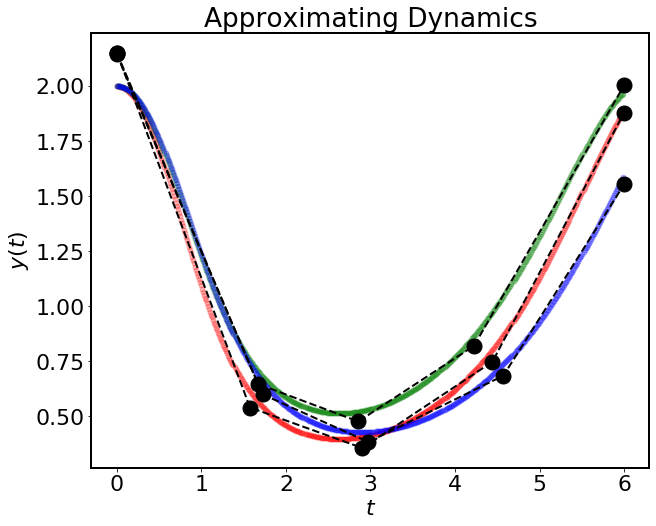

In [30]:
fig = plt.figure(figsize=(10,8))

chosen_obs = [0, 8, 10]
colors = ['r', 'g', 'b']

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx], learn.observed_time_series[i,time_start_idx:time_end_idx],
             color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    num_i_knots = int(0.5*(2+len(learn.obs_knots[i])))
    knots = np.copy(learn.obs_knots[i][num_i_knots:])
    knots = np.insert(knots, 0, learn.times[time_start_idx])
    knots = np.append(knots, learn.times[time_end_idx])
    plt.plot(knots, learn.obs_knots[i][:num_i_knots], 'k', linestyle='dashed', markersize=15, marker='o', linewidth=2)
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Approximating Dynamics')    

Text(0.5, 1.0, 'Generating Filtered Data')

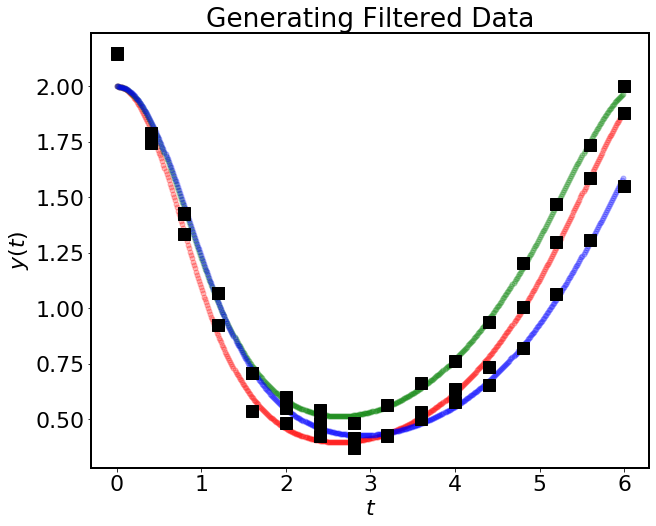

In [31]:
fig = plt.figure(figsize=(10,8))

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx], learn.observed_time_series[i,time_start_idx:time_end_idx],
             color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    plt.plot(learn.filtered_times, learn.filtered_obs[i,:],'k', linestyle='none', marker='s', 
            markersize=12)
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Generating Filtered Data')    

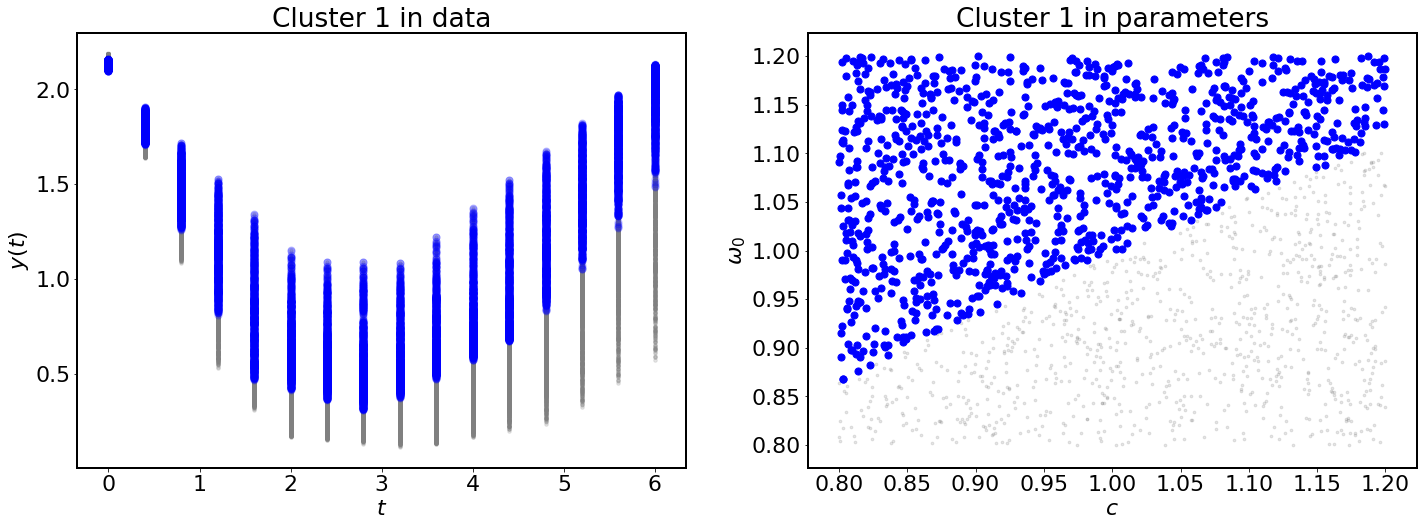

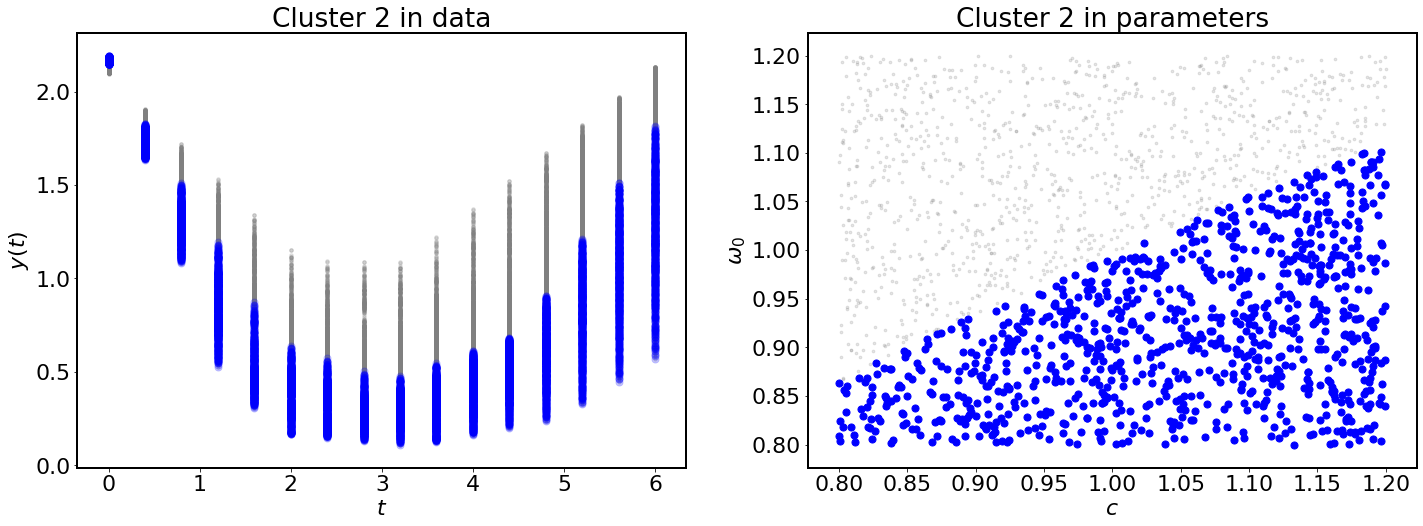

In [33]:
# # Plot clusters of predicted time series

for j in range(learn.num_clusters):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8), gridspec_kw={'width_ratios': [1, 1]}) 
    ax1.scatter(np.tile(learn.filtered_times,num_samples).reshape(num_samples,num_filtered_obs), 
                learn.filtered_predictions, 50, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    ax1.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_predictions[idx,:], 50, c='b', marker='o', alpha=0.2)
    ax1.set(title='Cluster ' + str(j+1) + ' in data')
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$y(t)$')
    
    ax2.scatter(params[:,2], params[:,3], 30, c='gray', marker='.', alpha=0.2)
    ax2.scatter(params[idx,2], params[idx,3], 50, c='blue', marker='o')
    ax2.set(title='Cluster ' + str(j+1) + ' in parameters')
    ax2.set_ylabel('$\omega_0$')
    ax2.set_xlabel('$c$')
    fig.tight_layout

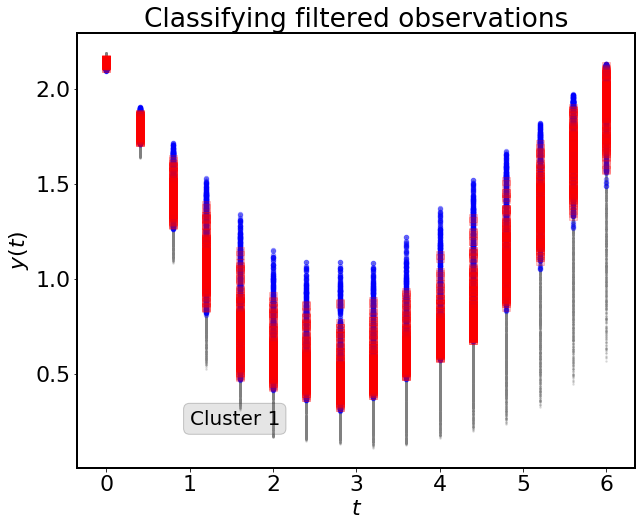

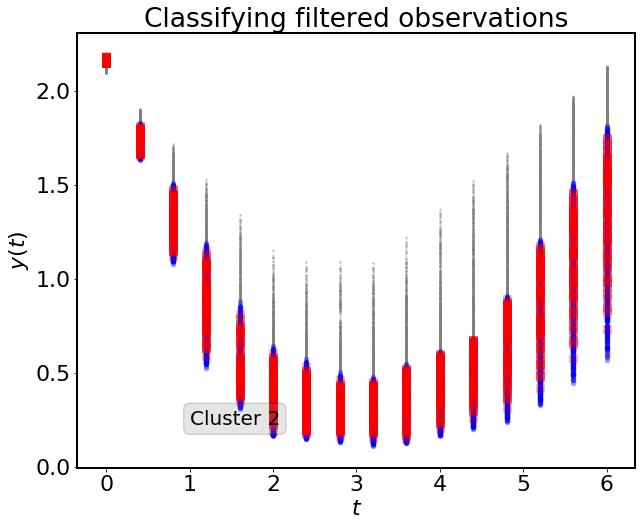

In [34]:
## # Plot oberved and predicted clusters

for j in range(learn.num_clusters):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(np.tile(learn.filtered_times,num_samples).reshape(num_samples,num_filtered_obs), 
                learn.filtered_predictions, 10, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    plt.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_predictions[idx,:], 20, c='b', marker='o', alpha=0.3)
    idx = np.where(learn.obs_labels == j)[0]    
    plt.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_obs[idx, :], 50, c='r', marker='s', alpha=0.2)
    plt.title('Classifying filtered observations')
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    bottom, top = plt.gca().get_ylim()
    props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
    plt.text(1, (top-bottom)*0.1+bottom, 
             'Cluster ' + str(j+1), 
             {'color': 'k', 'fontsize': 20},
             bbox=props)
    plt.text
    fig.tight_layout

In [35]:
# Find best KPCA transformation for given number of QoI and transform time series data.
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=2)

2 PCs explain 99.1439% of var. for cluster 1 with {'kernel': 'linear'}
2 PCs explain 57.2954% of var. for cluster 1 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
2 PCs explain 0.0000% of var. for cluster 1 with {'kernel': 'sigmoid'}
2 PCs explain 89.0051% of var. for cluster 1 with {'kernel': 'poly'}
2 PCs explain 97.8047% of var. for cluster 1 with {'kernel': 'cosine'}
---------------------------------------------
Best kPCA for cluster  1  is  {'kernel': 'linear'}
2 PCs explain 99.1439% of variance.
---------------------------------------------
2 PCs explain 98.5023% of var. for cluster 2 with {'kernel': 'linear'}
2 PCs explain 57.5171% of var. for cluster 2 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
2 PCs explain 0.0000% of var. for cluster 2 with {'kernel': 'sigmoid'}
2 PCs explain 86.6253% of var. for cluster 2 with {'kernel': 'poly'}
2 PCs explain 94.7215% of var. for cluster 2 with {'kernel': 'cosine'}
---------------------------------------------

In [36]:
%reset -f out

def plot_gap(all_eig_vals, n, cluster):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    #Plotting until maximum number of knots
    eig_vals = all_eig_vals[cluster].lambdas_[0:10]
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals/np.sum(eig_vals)*100, Marker='.', MarkerSize=20, linestyle='')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'k--')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n+1]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'r--')
    plt.text(n+1, eig_vals[n]/np.sum(eig_vals)*150, 
             r'%2.3f' %(np.sum(eig_vals[0:n+1])/np.sum(eig_vals)*100) + '% of variation explained by first ' + '%1d' %(n+1) + ' PCs.', 
                                                               {'color': 'k', 'fontsize': 20})
    plt.text(n+2, eig_vals[n+1]/np.sum(eig_vals)*150, 
             r'Order of magnitude of gap is %4.2f.' %(np.log10(eig_vals[n])-np.log10(eig_vals[n+1])), 
                                                               {'color': 'r', 'fontsize': 20})
    s = 'Determining QoI for cluster #%1d' %(cluster+1)
    plt.title(s)
    plt.xlabel('Principal Component #')
    plt.ylabel('% of Variation')
    plt.xlim([0.1, np.size(eig_vals)+1])
    plt.ylim([0,500])


wd.interact(plot_gap, all_eig_vals=wd.fixed(learn.kpcas),
            n = wd.IntSlider(value=0, min=0, max=5),
            cluster = wd.IntSlider(value=0, min=0, max=learn.num_clusters-1))

Flushing output cache (4 entries)


interactive(children=(IntSlider(value=0, description='n', max=5), IntSlider(value=0, description='cluster', ma…

<function __main__.plot_gap(all_eig_vals, n, cluster)>

In [39]:
# Generate kernel density estimates on new QoI
learn.generate_kdes()
# Calculate rejection rates for each cluster and print averages.
r_vals = learn.compute_r()

Diagnostic for clusters [sample average of ratios in each cluster]: [1.020809834503358, 0.9776278968478127]


In [49]:
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

for i in range(2, 4):
    true_param_marginals.append(GKDE(params_obs[:,i]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i-2].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
# for i in range(params.shape[1]):
#     true_param_marginals.append(GKDE(params_obs[:,i]))
#     param_marginals.append([])
#     for j in range(learn.num_clusters):
#         param_marginals[i].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
        
# for i in range(ics.shape[1]):
#     true_ic_marginals.append(GKDE(ics_obs[:,i]))
#     ic_marginals.append([])
#     for j in range(learn.num_clusters):
#         ic_marginals[i].append(GKDE(ics[lam_ptr[j], i], weights=learn.r[j]))

In [50]:
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

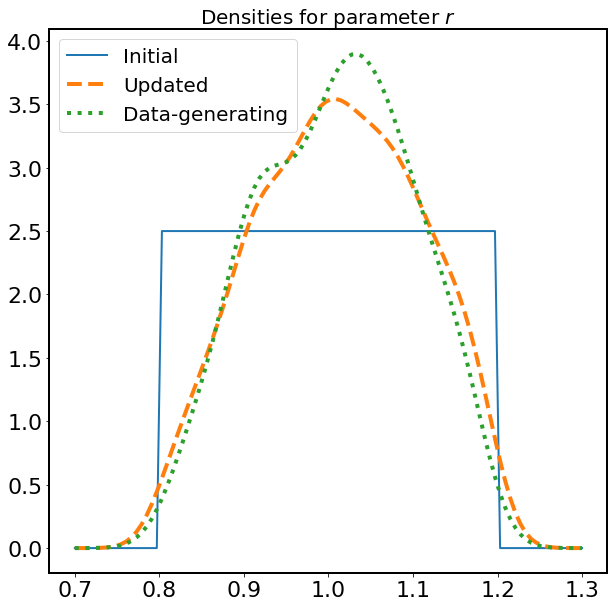

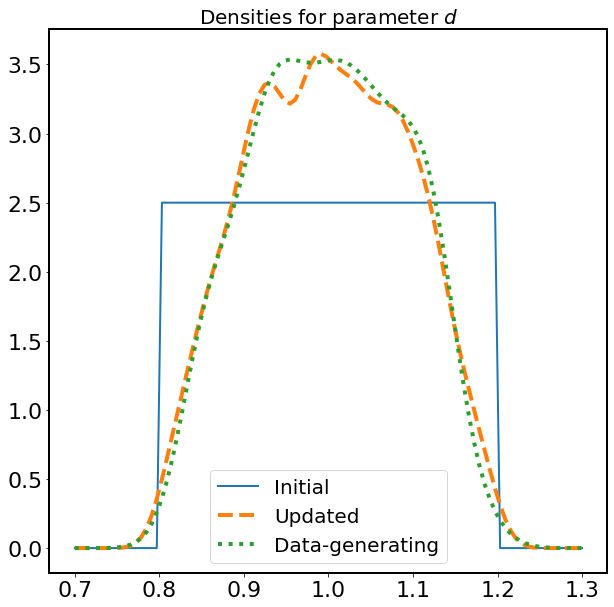

In [52]:
#for i in range(params.shape[1]):
for i in range(2, 4):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(params[:, i]), min(params_obs[:, i]))
    x_max = max(max(params[:, i]), max(params_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, param_range[i, :]),
         label = 'Initial', linewidth=2)
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i-2][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
    plt.plot(x, true_param_marginals[i-2](x), label = 'Data-generating', linewidth=4, linestyle='dotted')
    plt.title('Densities for parameter ' + param_labels[i], fontsize=20)
    plt.legend(fontsize=20)

In [53]:
# for i in range(ics.shape[1]):
#     fig = plt.figure(figsize=(10,10))
#     fig.clear()
#     x_min = min(min(ics[:, i]), min(ics_obs[:, i]))
#     x_max = max(max(ics[:, i]), max(ics_obs[:, i]))
#     delt = 0.25*(x_max - x_min)
#     x = np.linspace(x_min-delt, x_max+delt, 100)
#     plt.plot(x, unif_dist(x, ic_range[i, :]),
#          label = 'Initial')
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += ic_marginals[i][j](x) * cluster_weights[j]
#     plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
#     plt.plot(x, true_ic_marginals[i](x), label = 'Data-generating', linewidth=4, linestyle='dotted')
#     plt.title('Densities for initial condition ' + ic_labels[i], fontsize=20)
#     plt.legend(fontsize=20)

### Compute TV metric between densities

In [54]:
import scipy.integrate.quadrature as quad

In [58]:
def param_init_error(x):
    return np.abs(unif_dist(x,param_range[param_num, :])-true_param_marginals[param_num-2](x))

# for i in range(params.shape[1]):
for i in range(2,4):
    param_num=i
    TV_metric = quad(param_init_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.3663354698791043, 5.135713854187429e-09)
(0.3723511033064205, 9.604859463330229e-09)


In [60]:
def param_update_KDE_error(x):
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[param_num-2][j](x) * cluster_weights[j]
    return np.abs(mar-true_param_marginals[param_num-2](x))

# for i in range(params.shape[1]):
for i in range(2,4):
    param_num=i
    TV_metric = quad(param_update_KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.0752724909304704, 1.201089395996835e-08)
(0.04457910397445203, 6.420808273954748e-09)


In [61]:
from scipy.stats import beta 

In [64]:
def KDE_error(x):
    true_beta = beta(a=true_a, b=true_b,loc=param_range[i,0],scale=param_range[i,1]-param_range[i,0])
    return np.abs(true_beta.pdf(x)-true_param_marginals[param_num-2](x))

# for i in range(params.shape[1]):
for i in range(2,4):
    param_num=i
    TV_metric = quad(KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.09633061416747782, 3.875361295757607e-09)
(0.05018280272464763, 3.905262148384825e-09)


### Compute KL divergence

In [24]:
# def KL_margs_init(x):
#     return true_param_marginals[param_num](x)*\
#                 np.log(np.divide(true_param_marginals[param_num](x),
#                                  unif_dist(x,param_range[param_num, :])))

# for i in range(params.shape[1]):
#     param_num=i
#     KL = quad(KL_margs,param_range[i,0]-0.1,param_range[i,1]+0.1,maxiter=1000)
#     print(KL)

In [25]:
# def KL_margs_updated(x):
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += param_marginals[param_num][j](x) * cluster_weights[j]
#     return true_param_marginals[param_num](x)*\
#                 np.log(np.divide(true_param_marginals[param_num](x),
#                                  mar))

# for i in range(params.shape[1]):
#     param_num=i
#     KL = quad(KL_margs_updated,param_range[i,0]-0.1,param_range[i,1]+0.1,maxiter=1000)
#     print(KL)